In [1]:
import pandas as pd
import seaborn as sns
import statistics
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

# Exploratory Data Analysis

In [2]:
df=pd.read_csv("BreatCancer train.csv")

In [3]:
df.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,322,894855,B,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.1791,0.11550,0.2382,0.08553
1,84,8612080,B,12.00,15.65,76.95,443.3,0.09723,0.07165,0.04151,...,13.67,24.90,87.78,567.9,0.13770,0.20030,0.2267,0.07632,0.3379,0.07924
2,526,91813701,B,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,...,15.35,25.16,101.90,719.8,0.16240,0.31240,0.2654,0.14270,0.3518,0.08665
3,500,914862,B,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,...,16.76,20.43,109.70,856.9,0.11350,0.21760,0.1856,0.10180,0.2177,0.08549
4,561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905


In [4]:
# df_Wisconsin.head()

In [5]:
print(df.columns)
# print(df_Wisconsin.columns)

Index(['Unnamed: 0', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
# df_Wisconsin["Unnamed: 32"].isnull().sum()

In [7]:
# df_Wisconsin.shape

In [8]:
df.shape

(480, 33)

In [9]:
df.describe()

,Unnamed: 0,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,480.000000,4.800000e+02,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,284.985417,3.141418e+07,14.130290,19.226792,91.948063,655.667083,0.095861,0.103338,0.088134,0.048212,...,16.281400,25.645167,107.367750,883.535833,0.131830,0.252402,0.272323,0.114154,0.290058,0.083654
std,162.066708,1.292716e+08,3.533576,4.325535,24.285895,354.985856,0.013817,0.051865,0.078349,0.037798,...,4.861008,6.224530,33.686322,578.469823,0.023150,0.153645,0.206438,0.065300,0.063018,0.017616
min,0.000000,8.913000e+03,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,147.750000,8.682178e+05,11.697500,16.167500,75.022500,420.175000,0.085948,0.063738,0.029540,0.020310,...,13.050000,21.075000,84.147500,516.275000,0.114775,0.147575,0.116775,0.063975,0.248775,0.071090
50%,288.500000,9.053455e+05,13.375000,18.700000,86.140000,552.050000,0.094915,0.091280,0.061400,0.033600,...,14.980000,25.225000,97.860000,688.750000,0.131200,0.210900,0.227450,0.099515,0.282500,0.080015
75%,426.250000,8.812833e+06,15.750000,21.592500,103.875000,775.800000,0.104525,0.130600,0.132150,0.073767,...,18.602500,29.875000,125.525000,1050.500000,0.146150,0.341600,0.383500,0.161300,0.317675,0.091635
max,568.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.173000


In [10]:
# df_Wisconsin.describe()

In [11]:
#Both are exactly the same
#Taking only 1 of these

In [12]:
df.isnull().sum()

Unnamed: 0                 0
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Diagnosis

In [13]:
print(df["diagnosis"].describe(),"\n")
print("frequency:","\n",df["diagnosis"].value_counts())

count     480
unique      2
top         B
freq      302
Name: diagnosis, dtype: object 

frequency: 
 B    302
M    178
Name: diagnosis, dtype: int64


#### radius_mean

count    480.000000
mean      14.130290
std        3.533576
min        7.691000
25%       11.697500
50%       13.375000
75%       15.750000
max       28.110000
Name: radius_mean, dtype: float64 

frequency: 
 11.710    3
11.060    3
13.850    3
10.260    3
13.000    3
         ..
9.683     1
12.050    1
14.680    1
11.470    1
13.980    1
Name: radius_mean, Length: 398, dtype: int64 

398
[7.691, 7.76, 8.196, 8.219, 8.571, 8.597, 8.598, 8.618, 8.671, 8.726, 8.734, 8.878, 8.888, 8.95, 9.0, 9.029, 9.042, 9.173, 9.268, 9.333, 9.397, 9.405, 9.436, 9.465, 9.504, 9.567, 9.606, 9.667, 9.668, 9.676, 9.683, 9.72, 9.731, 9.738, 9.742, 9.755, 9.777, 9.787, 9.847, 9.876, 9.904, 10.05, 10.08, 10.17, 10.2, 10.26, 10.32, 10.44, 10.48, 10.49, 10.51, 10.57, 10.6, 10.65, 10.66, 10.71, 10.8, 10.82, 10.86, 10.88, 10.9, 10.91, 10.94, 10.95, 10.96, 10.97, 11.04, 11.06, 11.08, 11.13, 11.14, 11.15, 11.16, 11.2, 11.22, 11.26, 11.27, 11.28, 11.3, 11.31, 11.32, 11.33, 11.34, 11.36, 11.37, 11.41, 11.42, 11.43, 11

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


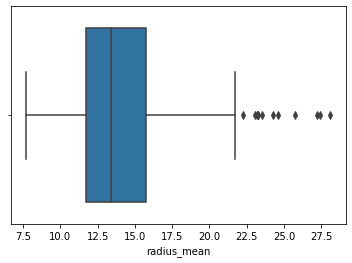

In [14]:
print(df["radius_mean"].describe(),"\n")
print("frequency:","\n",df["radius_mean"].value_counts(),"\n")
sns.boxplot(df["radius_mean"])
unique_radius_mean=list(pd.unique(df["radius_mean"]))
unique_radius_mean.sort()
print(len(unique_radius_mean))
print(unique_radius_mean)

#### texture_mean

count    480.000000
mean      19.226792
std        4.325535
min        9.710000
25%       16.167500
50%       18.700000
75%       21.592500
max       39.280000
Name: texture_mean, dtype: float64 

frequency: 
 16.85    3
14.93    3
20.52    3
19.83    3
16.84    3
        ..
20.38    1
17.20    1
14.63    1
16.54    1
19.62    1
Name: texture_mean, Length: 409, dtype: int64 

409
[9.71, 10.38, 10.72, 10.82, 10.89, 10.91, 11.28, 11.79, 11.89, 11.97, 12.17, 12.22, 12.35, 12.39, 12.44, 12.71, 12.83, 12.84, 12.87, 12.88, 12.91, 12.96, 13.06, 13.08, 13.1, 13.12, 13.14, 13.16, 13.21, 13.23, 13.27, 13.29, 13.32, 13.37, 13.39, 13.44, 13.47, 13.66, 13.78, 13.84, 13.86, 13.9, 13.93, 13.98, 14.07, 14.08, 14.09, 14.11, 14.16, 14.23, 14.26, 14.34, 14.36, 14.4, 14.45, 14.59, 14.63, 14.64, 14.69, 14.71, 14.74, 14.76, 14.83, 14.86, 14.88, 14.92, 14.93, 14.95, 14.96, 14.98, 15.04, 15.1, 15.11, 15.15, 15.18, 15.21, 15.24, 15.34, 15.39, 15.45, 15.46, 15.49, 15.5, 15.51, 15.56, 15.6, 15.62, 15.65, 15.66, 

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


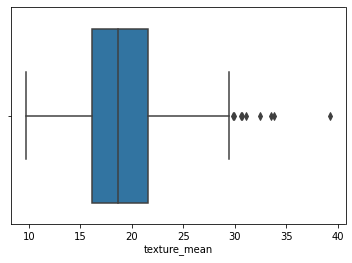

In [15]:
print(df["texture_mean"].describe(),"\n")
print("frequency:","\n",df["texture_mean"].value_counts(),"\n")
sns.boxplot(df["texture_mean"])
unique_texture_mean=list(pd.unique(df["texture_mean"]))
unique_texture_mean.sort()
print(len(unique_texture_mean))
print(unique_texture_mean)

#### perimeter_mean

In [16]:
# print(df["perimeter_mean"].describe(),"\n")
# print("frequency:","\n",df["perimeter_mean"].value_counts(),"\n")
# sns.boxplot(df["perimeter_mean"])
# unique_perimeter_mean=list(pd.unique(df["perimeter_mean"]))
# unique_perimeter_mean.sort()
# print(len(unique_perimeter_mean))
# print(unique_perimeter_mean)

#### area_mean

In [17]:
# print(df["area_mean"].describe(),"\n")
# print("frequency:","\n",df["area_mean"].value_counts(),"\n")
# sns.boxplot(df["area_mean"])
# unique_area_mean=list(pd.unique(df["area_mean"]))
# unique_area_mean.sort()
# print(len(unique_area_mean))
# print(unique_area_mean)

#### smoothness_mean

In [18]:
# print(df["smoothness_mean"].describe(),"\n")
# print("frequency:","\n",df["smoothness_mean"].value_counts(),"\n")
# sns.boxplot(df["smoothness_mean"])
# unique_smoothness_mean=list(pd.unique(df["smoothness_mean"]))
# unique_smoothness_mean.sort()
# print(len(unique_smoothness_mean))
# print(unique_smoothness_mean)

#### compactness_mean

In [19]:
# print(df["compactness_mean"].describe(),"\n")
# print("frequency:","\n",df["compactness_mean"].value_counts(),"\n")
# sns.boxplot(df["compactness_mean"])
# unique_compactness_mean=list(pd.unique(df["compactness_mean"]))
# unique_compactness_mean.sort()
# print(len(unique_compactness_mean))
# print(unique_compactness_mean)

#### concavity_mean

In [20]:
# print(df["concavity_mean"].describe(),"\n")
# print("frequency:","\n",df["concavity_mean"].value_counts(),"\n")
# sns.boxplot(df["concavity_mean"])
# unique_concavity_mean=list(pd.unique(df["concavity_mean"]))
# unique_concavity_mean.sort()
# print(len(unique_concavity_mean))
# print(unique_concavity_mean)

#### concave points_mean

In [21]:
# print(df["concave points_mean"].describe(),"\n")
# print("frequency:","\n",df["concave points_mean"].value_counts(),"\n")
# sns.boxplot(df["concave points_mean"])
# unique_concave_points_mean=list(pd.unique(df["concave points_mean"]))
# unique_concave_points_mean.sort()
# print(len(unique_concave_points_mean))
# print(unique_concave_points_mean)

#### symmetry_mean

In [22]:
# print(df["symmetry_mean"].describe(),"\n")
# print("frequency:","\n",df["symmetry_mean"].value_counts(),"\n")
# sns.boxplot(df["symmetry_mean"])
# unique_symmetry_mean=list(pd.unique(df["concave points_mean"]))
# unique_symmetry_mean.sort()
# print(len(unique_symmetry_mean))
# print(unique_symmetry_mean)

####  fractal_dimension_mean

In [23]:
# print(df["fractal_dimension_mean"].describe(),"\n")
# print("frequency:","\n",df["fractal_dimension_mean"].value_counts(),"\n")
# sns.boxplot(df["fractal_dimension_mean"])
# unique_fractal_dimension_mean=list(pd.unique(df["fractal_dimension_mean"]))
# unique_fractal_dimension_mean.sort()
# print(len(unique_fractal_dimension_mean))
# print(unique_fractal_dimension_mean)

#### radius_se

In [24]:
# print(df["radius_se"].describe(),"\n")
# print("frequency:","\n",df["radius_se"].value_counts(),"\n")
# sns.boxplot(df["radius_se"])
# unique_radius_se=list(pd.unique(df["radius_se"]))
# unique_radius_se.sort()
# print(len(unique_radius_se))
# print(unique_radius_se)

#### texture_se

In [25]:
# print(df["texture_se"].describe(),"\n")
# print("frequency:","\n",df["texture_se"].value_counts(),"\n")
# sns.boxplot(df["texture_se"])
# unique_texture_se=list(pd.unique(df["texture_se"]))
# unique_texture_se.sort()
# print(len(unique_texture_se))
# print(unique_texture_se)

#### perimeter_se

In [26]:
# print(df["perimeter_se"].describe(),"\n")
# print("frequency:","\n",df["perimeter_se"].value_counts(),"\n")
# sns.boxplot(df["perimeter_se"])
# unique_perimeter_se=list(pd.unique(df["perimeter_se"]))
# unique_perimeter_se.sort()
# print(len(unique_perimeter_se))
# print(unique_perimeter_se)

In [27]:
# creating a function for the same

In [28]:
def EDA(column_name): 
            print(df[column_name].describe(),"\n")
            print("frequency:","\n",df[column_name].value_counts(),"\n")
            sns.boxplot(df[column_name])
            unique=list(pd.unique(df[column_name]))
            unique.sort()
            print(len(unique))
            print(unique)

#### area_se

In [29]:
# EDA("area_se")

#### smoothness_se

In [30]:
# EDA("smoothness_se")

#### compactness_se

In [31]:
# EDA("compactness_se")

#### concavity_se

In [32]:
# EDA("concavity_se")

#### concave points_se

In [33]:
# EDA("concave points_se")

#### symmetry_se

In [34]:
# EDA("symmetry_se")

#### fractal_dimension_se

In [35]:
# EDA("fractal_dimension_se")

#### radius_worst

In [36]:
#  EDA("radius_worst")

#### texture_worst

In [37]:
# EDA("texture_worst")

####  perimeter_worst

In [38]:
# EDA("perimeter_worst")

In [39]:
df.columns

Index(['Unnamed: 0', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### area_worst

In [40]:
# EDA("area_worst")

#### smoothness_worst

In [41]:
# EDA("smoothness_worst")

#### compactness_worst

In [42]:
# EDA("compactness_worst")

#### concavity_worst

In [43]:
# EDA("concavity_worst")

#### concave points_worst

count    480.000000
mean       0.114154
std        0.065300
min        0.000000
25%        0.063975
50%        0.099515
75%        0.161300
max        0.291000
Name: concave points_worst, dtype: float64 

frequency: 
 0.00000    10
0.07431     3
0.02564     3
0.12180     3
0.06296     3
           ..
0.05185     1
0.14250     1
0.06845     1
0.20090     1
0.03333     1
Name: concave points_worst, Length: 419, dtype: int64 

419
[0.0, 0.008772, 0.009259, 0.01042, 0.01111, 0.01389, 0.01635, 0.01852, 0.02022, 0.02083, 0.0221, 0.02222, 0.02381, 0.025, 0.02564, 0.02579, 0.0268, 0.02778, 0.02784, 0.02796, 0.02832, 0.02899, 0.03002, 0.03125, 0.03194, 0.03264, 0.03312, 0.03333, 0.03532, 0.03571, 0.03612, 0.03715, 0.0377, 0.03846, 0.03922, 0.03953, 0.0399, 0.04044, 0.04052, 0.04074, 0.04195, 0.04262, 0.04306, 0.04419, 0.04464, 0.04537, 0.04603, 0.04715, 0.04762, 0.04766, 0.04773, 0.04786, 0.04793, 0.04815, 0.04866, 0.0497, 0.05, 0.05013, 0.05052, 0.05087, 0.05093, 0.05104, 0.05159, 0.05185, 0.0

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


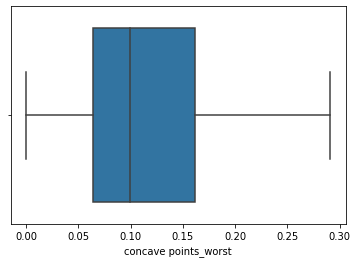

In [44]:
EDA("concave points_worst")

#### symmetry_worst

In [45]:
# EDA("symmetry_worst")

####  fractal_dimension_worst

In [46]:
# EDA("fractal_dimension_worst")

# Feature Engineering

In [47]:
df.shape

(480, 33)

In [48]:
df.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,322,894855,B,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.1791,0.11550,0.2382,0.08553
1,84,8612080,B,12.00,15.65,76.95,443.3,0.09723,0.07165,0.04151,...,13.67,24.90,87.78,567.9,0.13770,0.20030,0.2267,0.07632,0.3379,0.07924
2,526,91813701,B,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,...,15.35,25.16,101.90,719.8,0.16240,0.31240,0.2654,0.14270,0.3518,0.08665
3,500,914862,B,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,...,16.76,20.43,109.70,856.9,0.11350,0.21760,0.1856,0.10180,0.2177,0.08549
4,561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905


In [49]:
#Removing id
df.drop(df[["id"]],axis=1,inplace=True)

In [50]:
#Transforming diagnosis
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df["Diagnosis"]=LabelEncoder.fit_transform(df["diagnosis"])
df.drop(df[["diagnosis"]],axis=1,inplace=True)

In [51]:
df.shape

(480, 32)

In [52]:
df.head()

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,...,21.08,92.80,599.5,0.15470,0.22310,0.1791,0.11550,0.2382,0.08553,0
1,84,12.00,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,...,24.90,87.78,567.9,0.13770,0.20030,0.2267,0.07632,0.3379,0.07924,0
2,526,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,...,25.16,101.90,719.8,0.16240,0.31240,0.2654,0.14270,0.3518,0.08665,0
3,500,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,...,20.43,109.70,856.9,0.11350,0.21760,0.1856,0.10180,0.2177,0.08549,0
4,561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,0


In [53]:
# Malignant ==> 1, benign ==> 0
# benign means not dangerous 
# Malignant means leathal

### 1) Removing Outliers

In [54]:
df.drop(df[["Unnamed: 0"]],axis=1,inplace=True)

In [55]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,21.08,92.80,599.5,0.15470,0.22310,0.1791,0.11550,0.2382,0.08553,0
1,12.00,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,...,24.90,87.78,567.9,0.13770,0.20030,0.2267,0.07632,0.3379,0.07924,0
2,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,25.16,101.90,719.8,0.16240,0.31240,0.2654,0.14270,0.3518,0.08665,0
3,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,...,20.43,109.70,856.9,0.11350,0.21760,0.1856,0.10180,0.2177,0.08549,0
4,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,0


#### My created function A

In [56]:
#Creating a function to find outlier values in a column
def column_outlier_values(column,df):
    outlier_values=[]
    threshold=3
    mean=statistics.mean(column.values)
    variance=statistics.variance(column.values)
    std=math.sqrt(variance)
    for i in column.values:
        z_score= (i-mean)/std
        if abs(z_score) > threshold:
            outlier_values.append(i)
    return outlier_values

In [57]:
df.shape

(480, 31)

In [58]:
column_outlier_values(df["radius_mean"],df)

[27.22, 25.73, 28.11, 27.42]

In [59]:
df.shape

(480, 31)

#### My created function B

In [60]:
#Function to find the indexes of the outlier values in a column
def column_outlier_indexes(column,df):
    universal_outlier_indexes=[]
    #target values whose index we need to find
    outlier_value_list=[]
    outlier_value_list=outlier_value_list + column_outlier_values(column,df)
    #index column for original dataframe
    df["index_for_outlier_removal"]=df.index
    #finding the indexex of target values
    for i in outlier_value_list:
        target_row_i=df.loc[column==i]
        required_index_i=target_row_i["index_for_outlier_removal"]
        required_index_i=int(required_index_i)
        universal_outlier_indexes.append(required_index_i)
    df.drop(df[["index_for_outlier_removal"]],axis=1,inplace=True)
    return universal_outlier_indexes

#### My created function A and B combined

In [61]:
# This function will directly give you the index of the outliers in a column of a dataframe. 
def column_outlier_value_indexes(column,df):
    outlier_values=[]
    threshold=3
    mean=statistics.mean(column.values)
    variance=statistics.variance(column.values)
    std=math.sqrt(variance)
    for i in column.values:
        z_score= (i-mean)/std
        if abs(z_score) > threshold:
            outlier_values.append(i)
    outlier_indexes=[]
    outlier_value_list=outlier_values
    df["index_for_outlier_removal"]=df.index
    for i in outlier_value_list:
        target_row_i=df.loc[column==i]
        required_index_i=target_row_i["index_for_outlier_removal"]
        required_index_i=int(required_index_i)
        outlier_indexes.append(required_index_i)
    df.drop(df[["index_for_outlier_removal"]],axis=1,inplace=True)
    return outlier_indexes

In [62]:
df.shape

(480, 31)

In [63]:
column_outlier_value_indexes(df["radius_mean"],df)

[147, 231, 401, 406]

In [64]:
column_outlier_value_indexes(df["texture_mean"],df)

[236, 259, 289, 422]

In [65]:
column_outlier_value_indexes(df['concave points_worst'],df)

[]

In [66]:
column_outlier_value_indexes(df['fractal_dimension_worst'],df)

[42, 125, 166, 278, 387, 390, 419, 423]

In [67]:
df.shape

(480, 31)

In [68]:
'''Removing outliers from my data frame by: 1) Making a universal outlier indexes' list for my dataframe
2) Removing those indexes from my dataframe that are present in the univeral outlier indexes' list
'''

"Removing outliers from my data frame by: 1) Making a universal outlier indexes' list for my dataframe\n2) Removing those indexes from my dataframe that are present in the univeral outlier indexes' list\n"

In [69]:
df.shape

(480, 31)

In [70]:
outlier_columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

universal_outlier_indexes=[]
for i in outlier_columns:
    abc=column_outlier_value_indexes(df[i],df)
    universal_outlier_indexes = universal_outlier_indexes + abc

    
universal_outlier_indexes = set(universal_outlier_indexes)
universal_outlier_indexes = list(universal_outlier_indexes)
print(universal_outlier_indexes,"\n","Length:",len(universal_outlier_indexes))

[259, 4, 387, 390, 8, 143, 272, 401, 18, 147, 399, 277, 406, 278, 24, 25, 26, 156, 29, 31, 288, 289, 419, 293, 422, 166, 423, 41, 424, 299, 42, 302, 305, 435, 436, 188, 317, 446, 189, 318, 66, 68, 198, 71, 331, 204, 79, 471, 475, 348, 352, 226, 227, 231, 233, 362, 236, 109, 113, 243, 372, 245, 246, 377, 251, 125] 
 Length: 66


In [71]:
df.shape

(480, 31)

In [72]:
df.drop(df.index[universal_outlier_indexes],axis=0,inplace=True)

In [73]:
df.reset_index(drop=True,inplace=True)

In [74]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,...,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553,0
1,12.00,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,...,24.90,87.78,567.9,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924,0
2,13.46,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,...,25.16,101.90,719.8,0.1624,0.31240,0.26540,0.14270,0.3518,0.08665,0
3,15.04,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.061420,0.1668,0.06869,...,20.43,109.70,856.9,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549,0
4,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522,0


In [75]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Diagnosis                  0
dtype: int64

### 2) Feature Scaling

In [76]:
'''
The following columns require to be scaled down to mean 0 and standard deviation 1:
   radius_mean
The following collumns have standard deviation less than 1

'''

'\nThe following columns require to be scaled down to mean 0 and standard deviation 1:\n   radius_mean\nThe following collumns have standard deviation less than 1\n\n'

In [77]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,...,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553,0
1,12.00,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,...,24.90,87.78,567.9,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924,0
2,13.46,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,...,25.16,101.90,719.8,0.1624,0.31240,0.26540,0.14270,0.3518,0.08665,0
3,15.04,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.061420,0.1668,0.06869,...,20.43,109.70,856.9,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549,0
4,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522,0


In [78]:
#Function to find out which of the columns have standard deviation more than 1 /less than 1
def std_check(column):
    greaterthan1std=[]
    smallerthan1std=[]
    for i in df.columns:
        varian=statistics.variance(df[i].values)
        std=math.sqrt(varian)
        if std >=1:
            greaterthan1std.append(i)
        else:
            smallerthan1std.append(i)   
    return ("These are in greaterthan1std:",greaterthan1std,"\n\n","And these are in smallerthan1std",smallerthan1std)

In [79]:
std_check(df.columns)

('These are in greaterthan1std:',
 ['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'perimeter_se',
  'area_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst'],
 '\n\n',
 'And these are in smallerthan1std',
 ['smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_se',
  'texture_se',
  'smoothness_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'symmetry_se',
  'fractal_dimension_se',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_worst',
  'fractal_dimension_worst',
  'Diagnosis'])

In [80]:
greaterthan1std=['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'perimeter_se',
  'area_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst']

smallerthan1std=['smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_se',
  'texture_se',
  'smoothness_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'symmetry_se',
  'fractal_dimension_se',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_worst',
  'fractal_dimension_worst']

In [81]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,...,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553,0
1,12.00,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,...,24.90,87.78,567.9,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924,0
2,13.46,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,...,25.16,101.90,719.8,0.1624,0.31240,0.26540,0.14270,0.3518,0.08665,0
3,15.04,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.061420,0.1668,0.06869,...,20.43,109.70,856.9,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549,0
4,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522,0


In [82]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
#This is the dataframe that has all the scaled down values of df columns that are in greaterthan1std
df_scaled_columns=StandardScaler.fit_transform(df[greaterthan1std])
df_scaled_columns=pd.DataFrame(df_scaled_columns)
df_scaled_columns.columns=greaterthan1std
df_scaled_columns.reset_index(drop=True,inplace=True)

In [83]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,...,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553,0
1,12.00,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,...,24.90,87.78,567.9,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924,0
2,13.46,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,...,25.16,101.90,719.8,0.1624,0.31240,0.26540,0.14270,0.3518,0.08665,0
3,15.04,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.061420,0.1668,0.06869,...,20.43,109.70,856.9,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549,0
4,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522,0


In [84]:
#Now adjusting these scaled down value columns in our main dataframe
df.drop(df[greaterthan1std],axis=1,inplace=True)

In [85]:
df.head()

,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,...,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,0.2212,1.0420,0.005910,0.02016,...,0.010110,0.01202,0.003107,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553,0
1,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,0.2271,1.2550,0.005969,0.01812,...,0.007027,0.01972,0.002607,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924,0
2,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,0.1998,0.6068,0.004413,0.01443,...,0.007369,0.01354,0.001787,0.1624,0.31240,0.26540,0.14270,0.3518,0.08665,0
3,0.09883,0.13640,0.077210,0.061420,0.1668,0.06869,0.3720,0.8423,0.004123,0.01819,...,0.010040,0.01055,0.003237,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549,0
4,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,0.2976,1.9660,0.012890,0.01104,...,0.004967,0.04243,0.001963,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522,0


In [86]:
df=pd.concat([df,df_scaled_columns],axis=1)
df=df[['Diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

In [87]:
df.isnull().sum()

Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [88]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.337528,-1.390667,-0.346413,-0.416349,0.11340,0.08834,0.038000,0.034000,0.1543,...,-0.442951,-0.712955,-0.401086,-0.492554,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553
1,0,-0.619807,-0.805099,-0.628980,-0.630262,0.09723,0.07165,0.041510,0.018630,0.2079,...,-0.532112,-0.050029,-0.577996,-0.561626,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924
2,0,-0.140589,-0.026018,-0.124018,-0.255305,0.10750,0.11380,0.042010,0.031520,0.1723,...,-0.127273,-0.004909,-0.080392,-0.229601,0.1624,0.31240,0.26540,0.14270,0.3518,0.08665
3,0,0.378018,-0.531164,0.419454,0.225740,0.09883,0.13640,0.077210,0.061420,0.1668,...,0.212503,-0.825757,0.194488,0.070074,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549
4,0,-0.875828,0.252943,-0.870149,-0.825045,0.10540,0.06779,0.005006,0.007583,0.1940,...,-0.939361,0.102687,-0.961066,-0.849716,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522


In [89]:
df.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,414.000000,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,414.000000,414.000000,414.000000,414.000000,414.000000,...,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.326087,-7.723291e-17,-8.313264e-17,5.492118e-16,8.581434e-18,0.094521,0.093484,0.072824,0.042479,0.176681,...,-3.904552e-16,-4.140542e-16,9.439577e-17,-9.868649e-17,0.130276,0.229813,0.240203,0.105849,0.283047,0.081166
std,0.469347,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,0.012349,0.040674,0.059700,0.031483,0.022862,...,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,0.021230,0.126459,0.170332,0.057739,0.049771,0.014421
min,0.000000,-2.034158e+00,-2.297920e+00,-2.006194e+00,-1.579481e+00,0.062510,0.019380,0.000000,0.000000,0.116700,...,-1.735063e+00,-2.285236e+00,-1.751170e+00,-1.314201e+00,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,0.000000,-7.018652e-01,-7.196516e-01,-6.948082e-01,-6.966969e-01,0.085157,0.061735,0.027105,0.019240,0.160100,...,-6.785051e-01,-7.459282e-01,-6.948197e-01,-6.633754e-01,0.114325,0.139725,0.108750,0.062442,0.247725,0.070565
50%,0.000000,-2.242878e-01,-1.051827e-01,-2.198116e-01,-2.930440e-01,0.094010,0.084215,0.052580,0.030690,0.176300,...,-2.598097e-01,-1.879188e-02,-2.631169e-01,-3.306948e-01,0.129900,0.200250,0.195150,0.091835,0.277950,0.078530
75%,1.000000,4.559727e-01,6.405992e-01,4.878094e-01,3.279136e-01,0.103475,0.118725,0.108000,0.061268,0.192775,...,4.390200e-01,6.606207e-01,4.720112e-01,3.066332e-01,0.143600,0.302900,0.347150,0.148975,0.310900,0.088998
max,1.000000,3.079366e+00,2.982241e+00,2.988552e+00,3.692180e+00,0.127800,0.223600,0.317400,0.147400,0.254000,...,3.203012e+00,2.849839e+00,3.232266e+00,3.912949e+00,0.190900,0.664300,0.848900,0.270100,0.475300,0.134100


# Feature Selection

## Filter Method

Correlation Coefficient method

In [90]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.337528,-1.390667,-0.346413,-0.416349,0.11340,0.08834,0.038000,0.034000,0.1543,...,-0.442951,-0.712955,-0.401086,-0.492554,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553
1,0,-0.619807,-0.805099,-0.628980,-0.630262,0.09723,0.07165,0.041510,0.018630,0.2079,...,-0.532112,-0.050029,-0.577996,-0.561626,0.1377,0.20030,0.22670,0.07632,0.3379,0.07924
2,0,-0.140589,-0.026018,-0.124018,-0.255305,0.10750,0.11380,0.042010,0.031520,0.1723,...,-0.127273,-0.004909,-0.080392,-0.229601,0.1624,0.31240,0.26540,0.14270,0.3518,0.08665
3,0,0.378018,-0.531164,0.419454,0.225740,0.09883,0.13640,0.077210,0.061420,0.1668,...,0.212503,-0.825757,0.194488,0.070074,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549
4,0,-0.875828,0.252943,-0.870149,-0.825045,0.10540,0.06779,0.005006,0.007583,0.1940,...,-0.939361,0.102687,-0.961066,-0.849716,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522


In [91]:
df_x=df.drop(df[["Diagnosis"]],axis=1)
df_Y=df[["Diagnosis"]]

<AxesSubplot:>

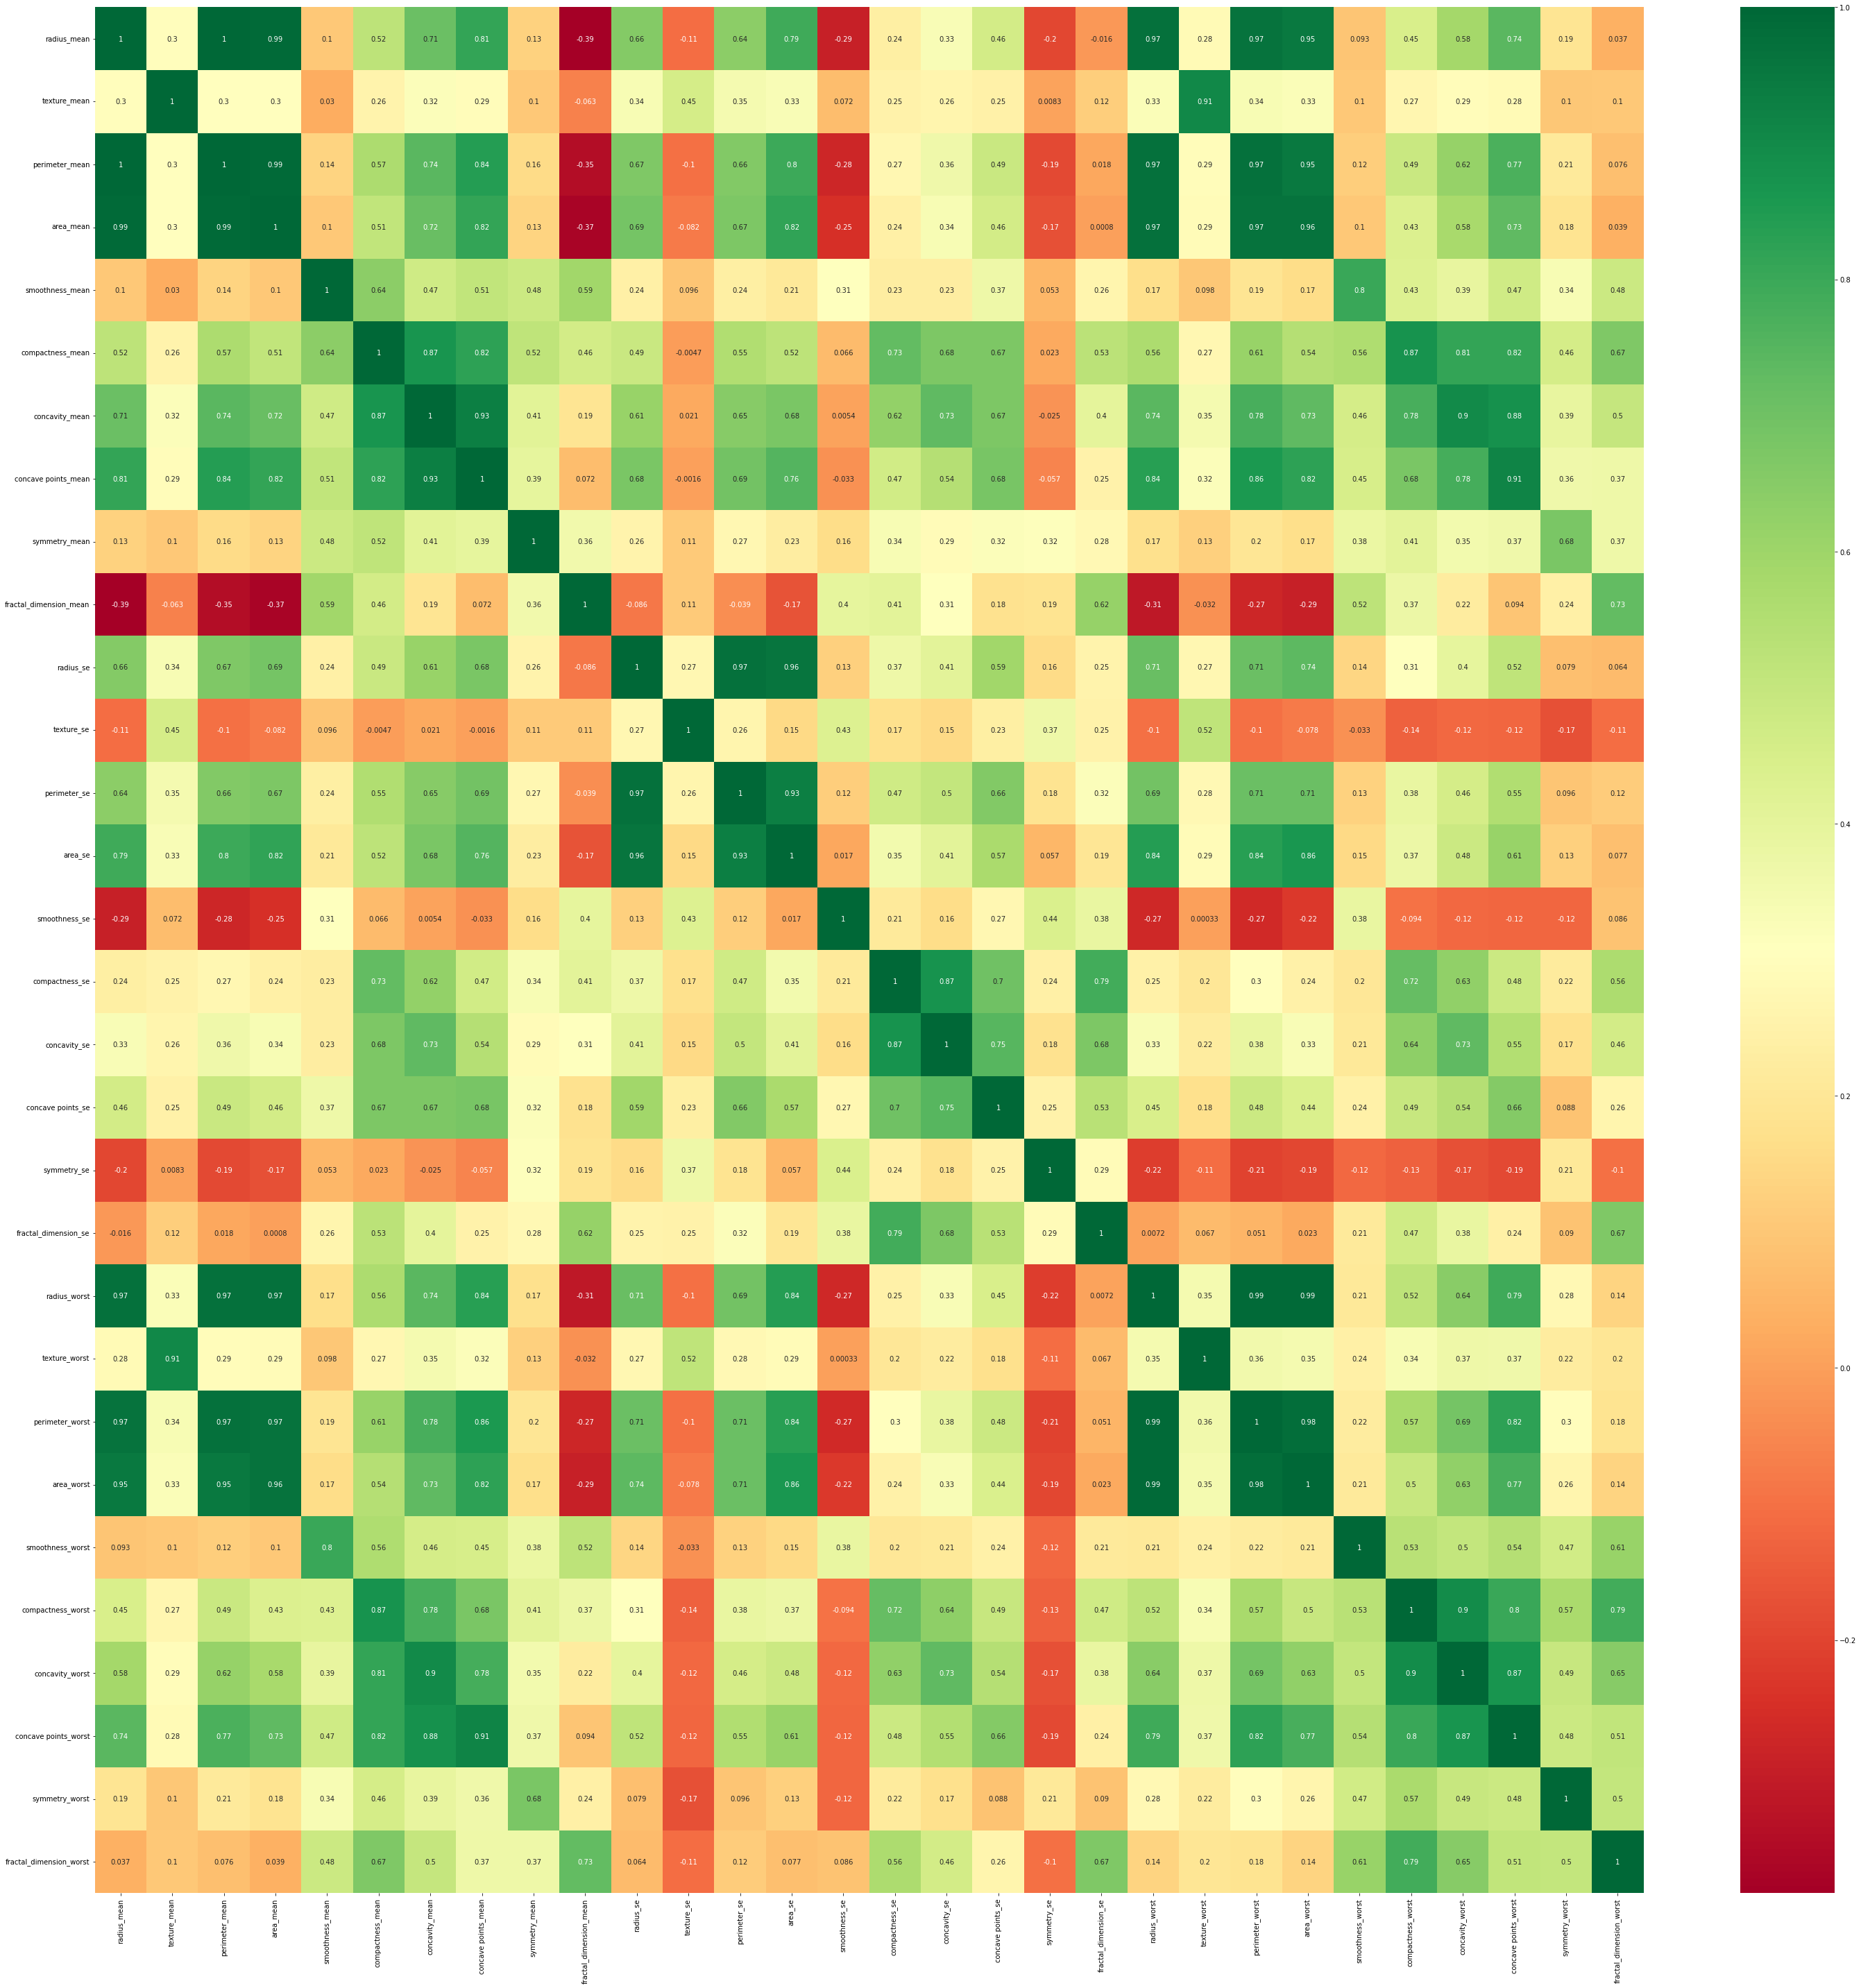

In [92]:
plt.figure(figsize=[50,50])
correlation_matrix=df_x.corr()
sns.heatmap(correlation_matrix,annot=True,cmap = "RdYlGn")

In [93]:
threshold=0.85

In [94]:
correlation_matrix.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [95]:
# find and remove correlated features
def correlation(dataset, threshold_value):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [96]:
correlation(df_x,threshold)

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [97]:
df.drop(df[['area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst']],axis=1,inplace=True)

In [98]:
df.shape

(414, 17)

In [99]:
df_x=df.drop(df[["Diagnosis"]],axis=1)
df_Y=df[["Diagnosis"]]

<AxesSubplot:>

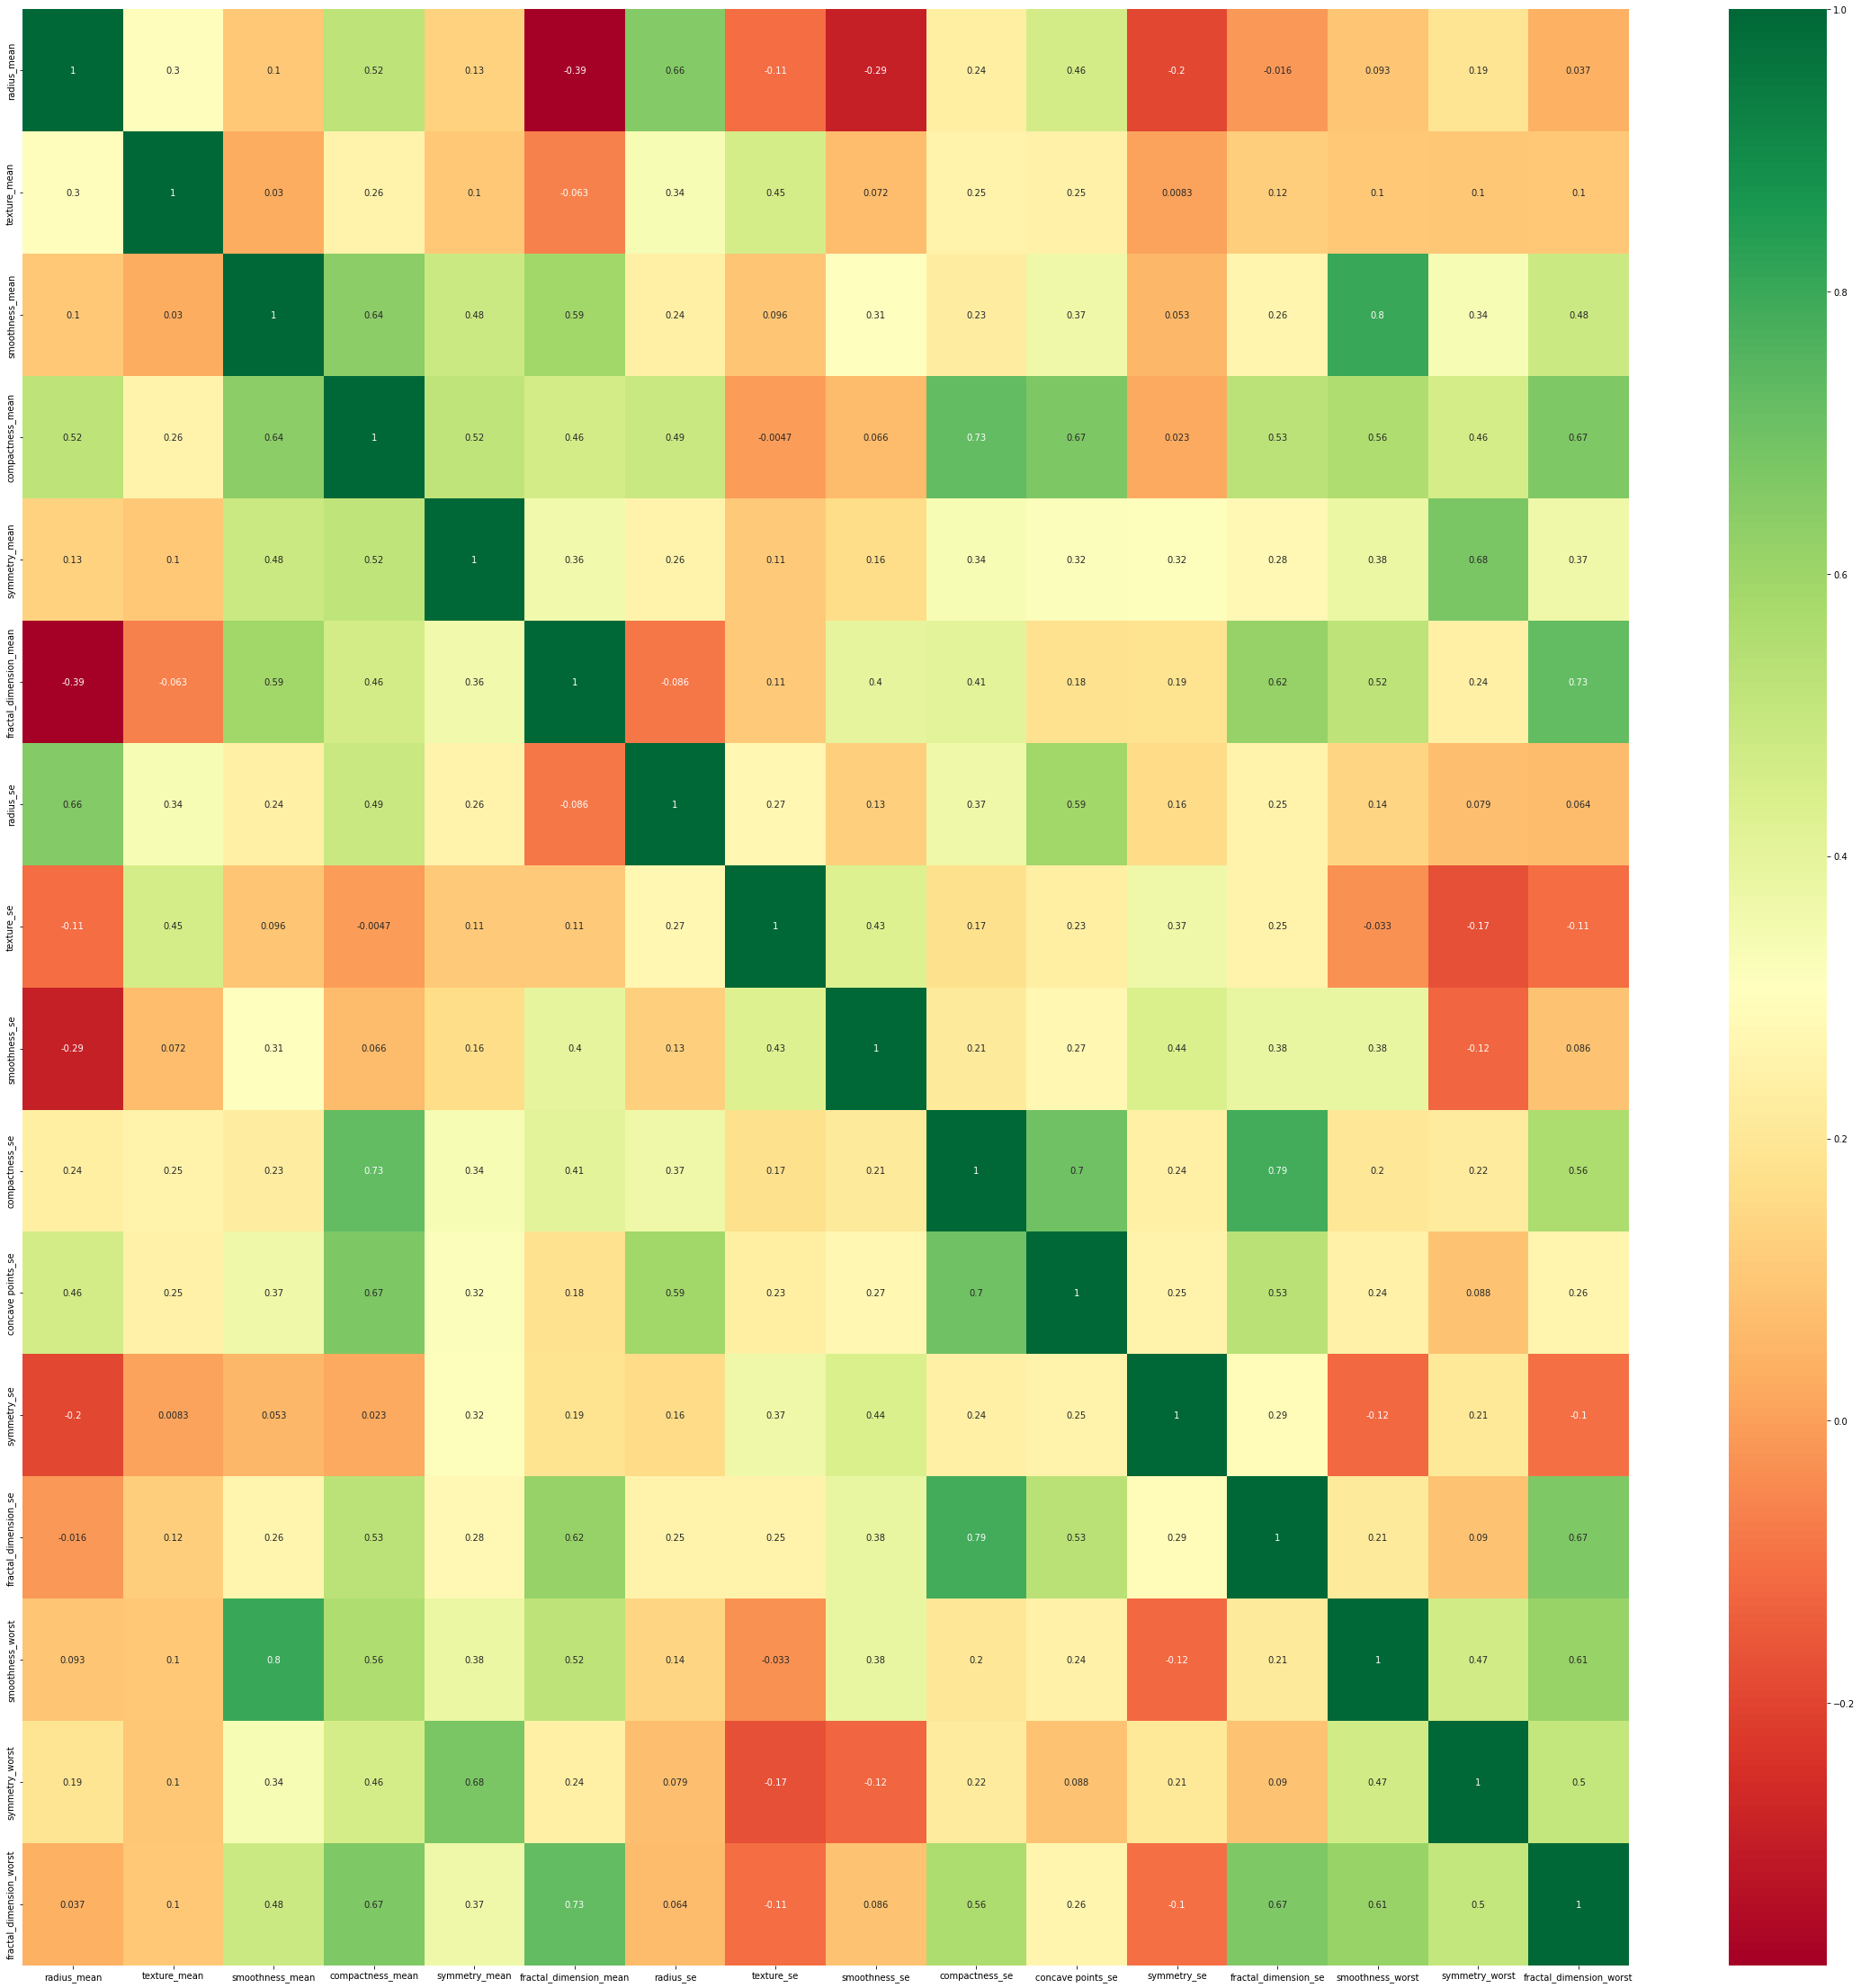

In [100]:
plt.figure(figsize=[40,40])
correlation_matrix=df_x.corr()
sns.heatmap(correlation_matrix,annot=True,cmap = "RdYlGn")

In [101]:
# I used correlation coefficient to find and get rid highly correlated independent features

In [102]:
'''Now using SelectKBest with chi2 test to filter out features on the basis of correlation with
dependent feature'''

'Now using SelectKBest with chi2 test to filter out features on the basis of correlation with\ndependent feature'

In [103]:
df.head()

,Diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.337528,-1.390667,0.11340,0.08834,0.1543,0.06476,0.2212,1.0420,0.005910,0.02016,0.010110,0.01202,0.003107,0.1547,0.2382,0.08553
1,0,-0.619807,-0.805099,0.09723,0.07165,0.2079,0.05968,0.2271,1.2550,0.005969,0.01812,0.007027,0.01972,0.002607,0.1377,0.3379,0.07924
2,0,-0.140589,-0.026018,0.10750,0.11380,0.1723,0.06317,0.1998,0.6068,0.004413,0.01443,0.007369,0.01354,0.001787,0.1624,0.3518,0.08665
3,0,0.378018,-0.531164,0.09883,0.13640,0.1668,0.06869,0.3720,0.8423,0.004123,0.01819,0.010040,0.01055,0.003237,0.1135,0.2177,0.08549
4,0,-0.875828,0.252943,0.10540,0.06779,0.1940,0.06028,0.2976,1.9660,0.012890,0.01104,0.004967,0.04243,0.001963,0.1424,0.3292,0.06522


In [104]:
df.columns

Index(['Diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [105]:
x=df.iloc[:,1:].values
Y=df.iloc[:,0].values

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [107]:
### Apply SelectKBest Algorithm
# SelectKBest_=SelectKBest(score_func=chi2,k=16)
# SelectKBest_.fit(x,Y)

In [108]:
'''chi2 will not work here due to the fact that for chi2 test all values should be positive'''

'chi2 will not work here due to the fact that for chi2 test all values should be positive'

In [109]:
'''So now, going for Extratrees for finding feature importance'''

'So now, going for Extratrees for finding feature importance'

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier=ExtraTreesClassifier()
ExtraTreesClassifier.fit(x,Y)

ExtraTreesClassifier()

In [111]:
print(ExtraTreesClassifier.feature_importances_)

[0.24928671 0.07463364 0.02723087 0.11626768 0.02523815 0.03701103
 0.13586308 0.02079703 0.02921276 0.02497931 0.04452304 0.03018677
 0.02391996 0.05750984 0.0613397  0.04200043]


In [112]:
ranked_features=pd.Series(ExtraTreesClassifier.feature_importances_,index=['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'])
ranked_features.sort_values()

texture_se                 0.020797
fractal_dimension_se       0.023920
compactness_se             0.024979
symmetry_mean              0.025238
smoothness_mean            0.027231
smoothness_se              0.029213
symmetry_se                0.030187
fractal_dimension_mean     0.037011
fractal_dimension_worst    0.042000
concave points_se          0.044523
smoothness_worst           0.057510
symmetry_worst             0.061340
texture_mean               0.074634
compactness_mean           0.116268
radius_se                  0.135863
radius_mean                0.249287
dtype: float64

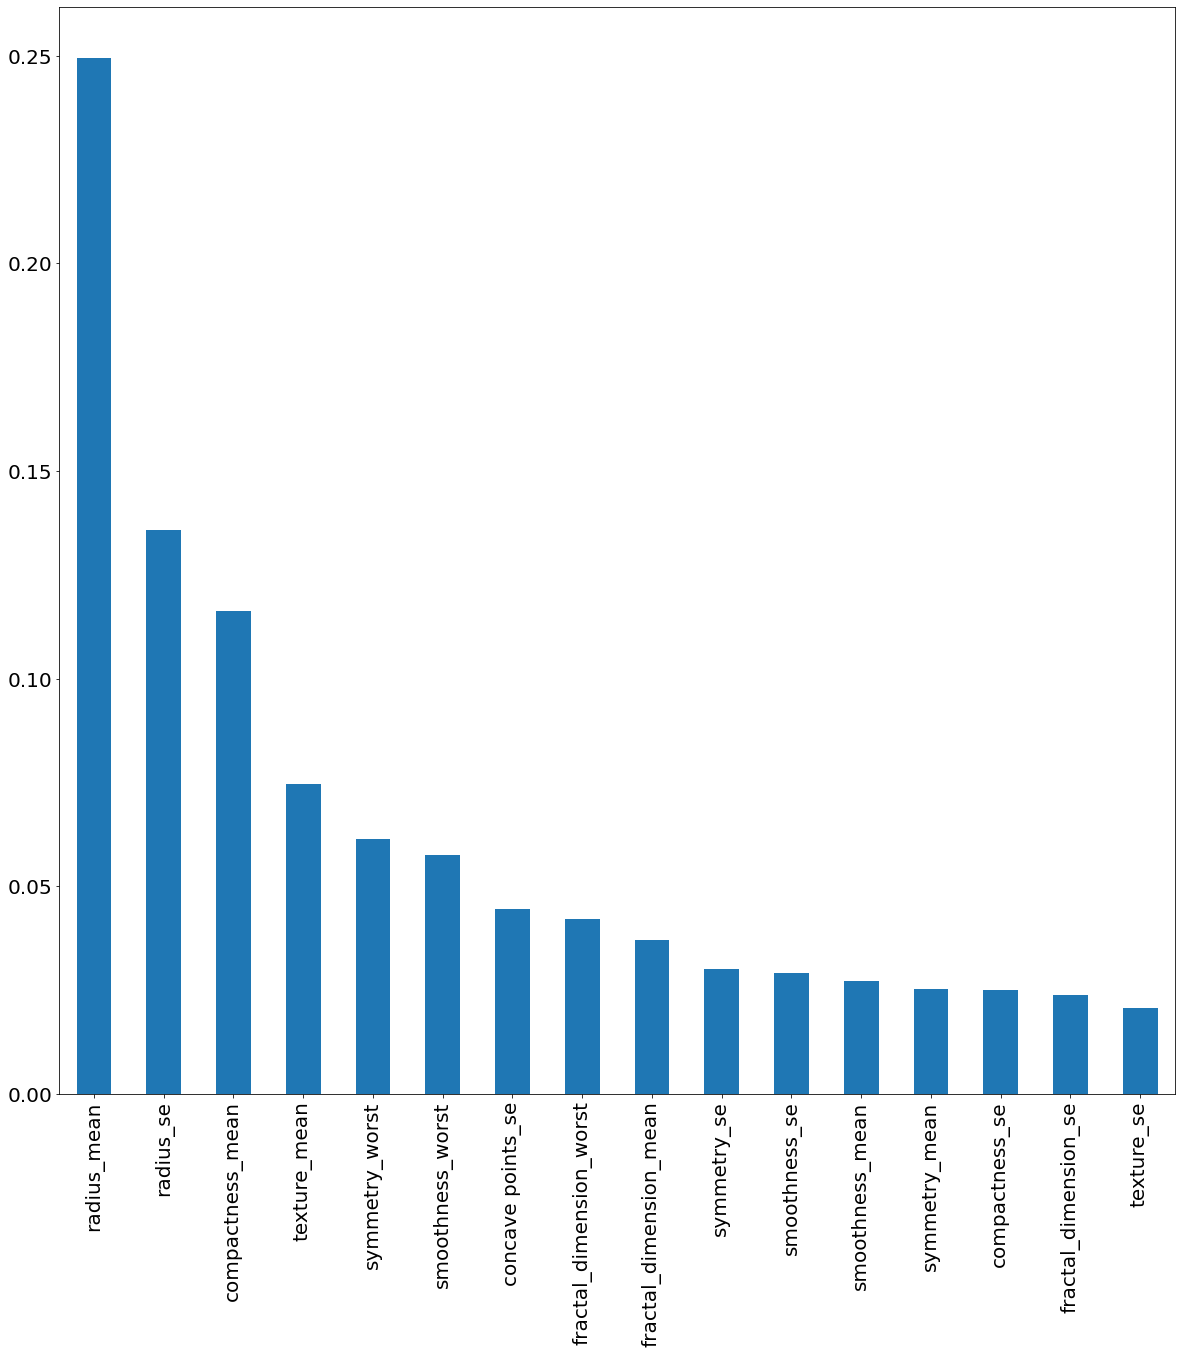

In [113]:
#Plotting a graph of this data
plt.figure(figsize=[20,20])
ranked_features=pd.Series(ExtraTreesClassifier.feature_importances_,index=['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'])
ranked_features.nlargest(16).plot(kind="bar")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [114]:
#Choosing a threshold 
threshold=0.028

In [115]:
def ranked_features_choose(ranked_feature_series,threshold):
    remove_features=[]
    for i in ranked_feature_series:
        if threshold > i:
            remove_features.append(i)
    return remove_features

In [116]:
ranked_features_choose(ranked_features,threshold)
rf_values=ranked_features_choose(ranked_features,threshold)

In [117]:
#Dropping the columns
df.drop(df[['texture_se','fractal_dimension_se','smoothness_se','symmetry_mean','compactness_se','smoothness_mean']],axis=1,inplace=True)

In [118]:
df.head()

,Diagnosis,radius_mean,texture_mean,compactness_mean,fractal_dimension_mean,radius_se,concave points_se,symmetry_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.337528,-1.390667,0.08834,0.06476,0.2212,0.010110,0.01202,0.1547,0.2382,0.08553
1,0,-0.619807,-0.805099,0.07165,0.05968,0.2271,0.007027,0.01972,0.1377,0.3379,0.07924
2,0,-0.140589,-0.026018,0.11380,0.06317,0.1998,0.007369,0.01354,0.1624,0.3518,0.08665
3,0,0.378018,-0.531164,0.13640,0.06869,0.3720,0.010040,0.01055,0.1135,0.2177,0.08549
4,0,-0.875828,0.252943,0.06779,0.06028,0.2976,0.004967,0.04243,0.1424,0.3292,0.06522


In [119]:
df.shape

(414, 11)

In [120]:
df.columns

Index(['Diagnosis', 'radius_mean', 'texture_mean', 'compactness_mean',
       'fractal_dimension_mean', 'radius_se', 'concave points_se',
       'symmetry_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

### Creating Synthetic rows ( to balance B and M diagnosis scenerios in dataset)

In [121]:
x=df.iloc[:,1:].values
Y=df.iloc[:,0].values

In [122]:
from imblearn.combine import SMOTETomek
os=SMOTETomek()
x,Y=os.fit_resample(x,Y)

In [123]:
x_df=pd.DataFrame(x,columns=['radius_mean', 'texture_mean', 'compactness_mean',
       'fractal_dimension_mean', 'radius_se', 'concave points_se',
       'symmetry_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'])
Y_df=pd.DataFrame(Y,columns=["Diagnosis"])
x_df.reset_index(drop=True,inplace=True)
Y_df.reset_index(drop=True,inplace=True)
df_SMOTE=pd.concat([x_df,Y_df],axis=1)
df=df_SMOTE

(array([273.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 273.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

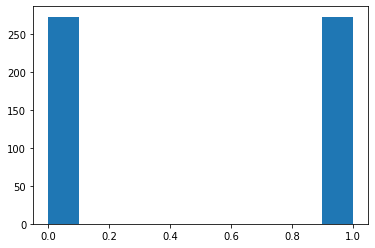

In [124]:
plt.hist(df["Diagnosis"].values)

In [125]:
df["Diagnosis"].value_counts()

0    273
1    273
Name: Diagnosis, dtype: int64

In [126]:
df=df[['Diagnosis', 'radius_mean', 'texture_mean', 'compactness_mean',
       'fractal_dimension_mean', 'radius_se', 'concave points_se',
       'symmetry_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst']]

In [127]:
df.head()

,Diagnosis,radius_mean,texture_mean,compactness_mean,fractal_dimension_mean,radius_se,concave points_se,symmetry_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.337528,-1.390667,0.08834,0.06476,0.2212,0.010110,0.01202,0.1547,0.2382,0.08553
1,0,-0.619807,-0.805099,0.07165,0.05968,0.2271,0.007027,0.01972,0.1377,0.3379,0.07924
2,0,-0.140589,-0.026018,0.11380,0.06317,0.1998,0.007369,0.01354,0.1624,0.3518,0.08665
3,0,0.378018,-0.531164,0.13640,0.06869,0.3720,0.010040,0.01055,0.1135,0.2177,0.08549
4,0,-0.875828,0.252943,0.06779,0.06028,0.2976,0.004967,0.04243,0.1424,0.3292,0.06522


# Modal Building

In [128]:
df.shape

(546, 11)

#### Just Trying Pairplot

In [129]:
# sns.set_style("darkgrid")

In [130]:
# sns.pairplot(df,diag_kind="reg")

In [131]:
# sns.pairplot(df,hue="Diagnosis")
#0 => benign (blue)
#1 => malignant (orange)

In [132]:
# sns.pairplot(df,kind="reg")

In [133]:
# g=sns.pairplot(df)
# g.map_upper(sns.kdeplot,n_levels=6,color="xkcd:wine red")
# g

In [134]:
# df_pairplot=df[['Diagnosis', 'radius_mean', 'texture_mean', 'compactness_mean',
#        'fractal_dimension_mean']].sample(50)

In [135]:
# df_pairplot.shape

In [136]:
# g=sns.pairplot(df_pairplot,hue="Diagnosis")
# g.map_upper(sns.kdeplot,n_levels=4,color="xkcd:wine red")
# g

#### Analysing Data With Pairplot

In [137]:
# sns.pairplot(df, 
#              hue='Diagnosis', 
#              y_vars=['Diagnosis'],
#              x_vars=['radius_mean', 'texture_mean', 'compactness_mean',
#        'fractal_dimension_mean', 'radius_se', 'concave points_se',
#        'symmetry_se', 'smoothness_worst', 'symmetry_worst',
#        'fractal_dimension_worst'])

In [138]:
# Will not be using pairplotting because it should only be used when the data has at most 6 dimensions

### When the dimenstions are more than 6 then we go for a Different Theme called
###   Dimension Reduction ( it inclues PCA plot, t-SNE plots, MDS)

## Applying Principle Component Analysis

In [139]:
df.columns

Index(['Diagnosis', 'radius_mean', 'texture_mean', 'compactness_mean',
       'fractal_dimension_mean', 'radius_se', 'concave points_se',
       'symmetry_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [140]:
# x_train=df.iloc[:,1:].values
# Y_train=df.iloc[:,0].values

In [141]:
# from sklearn.decomposition import PCA
# PCA=PCA(n_components=1)

In [142]:
# PCA.fit(x)
# net_feature=PCA.transform(x)

In [143]:
#net_feature :All independent variables converted together to make a single feature(for visualization)
#Y: Dependent variable
''' Now, making a graph to analyse and create a psuedo priority order of ML algorithms'''

' Now, making a graph to analyse and create a psuedo priority order of ML algorithms'

In [144]:
# plt.figure(figsize=(8,6))
# plt.scatter(net_feature,Y,c=Y,cmap='viridis')
# plt.xlabel("Net Feature")
# plt.ylabel("Diagnosis")
# plt.show()

In [145]:
#Checking net feature cum dependent variable's performance in all ml algorithms

# Note: I am stopping this technique of model selection right now. The dataset is quite small and that technique should not be practiced here. (Its not the most efficient way. Also its kinda stupid to work that technique on such a small dataset)

In [146]:
df.head()

,Diagnosis,radius_mean,texture_mean,compactness_mean,fractal_dimension_mean,radius_se,concave points_se,symmetry_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.337528,-1.390667,0.08834,0.06476,0.2212,0.010110,0.01202,0.1547,0.2382,0.08553
1,0,-0.619807,-0.805099,0.07165,0.05968,0.2271,0.007027,0.01972,0.1377,0.3379,0.07924
2,0,-0.140589,-0.026018,0.11380,0.06317,0.1998,0.007369,0.01354,0.1624,0.3518,0.08665
3,0,0.378018,-0.531164,0.13640,0.06869,0.3720,0.010040,0.01055,0.1135,0.2177,0.08549
4,0,-0.875828,0.252943,0.06779,0.06028,0.2976,0.004967,0.04243,0.1424,0.3292,0.06522


In [147]:
df=df.sample(frac=1)
df_train=df

In [202]:
# df_train.to_csv("df_train_preprocessed.csv")

In [148]:
df_train.head()

,Diagnosis,radius_mean,texture_mean,compactness_mean,fractal_dimension_mean,radius_se,concave points_se,symmetry_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
78,0,-1.694438,-0.759862,0.082010,0.076330,0.166500,0.010400,0.017080,0.172400,0.292600,0.101700
424,1,2.013109,1.791937,0.136595,0.058721,0.451847,0.009430,0.014462,0.138497,0.323644,0.082575
396,0,-0.245623,0.474102,0.108900,0.060200,0.315200,0.012540,0.015610,0.135100,0.256300,0.081740
488,1,0.173204,0.777668,0.177595,0.070993,0.602190,0.016401,0.017422,0.154184,0.315220,0.111829
329,0,-0.655913,-0.126545,0.115400,0.063140,0.296300,0.017850,0.027930,0.140500,0.339700,0.083650


In [149]:
df_train.shape

(546, 11)

In [150]:
x_train=df_train.iloc[:,1:].values
Y_train=df_train.iloc[:,0].values

In [151]:
x_train

array([[-1.69443835, -0.75986225,  0.08201   , ...,  0.1724    ,
         0.2926    ,  0.1017    ],
       [ 2.01310928,  1.79193683,  0.13659453, ...,  0.13849691,
         0.32364363,  0.08257528],
       [-0.24562288,  0.47410199,  0.1089    , ...,  0.1351    ,
         0.2563    ,  0.08174   ],
       ...,
       [ 0.21061941, -1.22479786,  0.09242   , ...,  0.1347    ,
         0.2606    ,  0.0781    ],
       [ 1.80910862, -0.16926837,  0.1442    , ...,  0.1518    ,
         0.359     ,  0.07787   ],
       [ 1.45133588, -0.06874175,  0.08468   , ...,  0.1234    ,
         0.3206    ,  0.06938   ]])

In [152]:
Y_train

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [153]:
df_test=pd.read_csv("BreastCancer test.csv")

In [154]:
df_test.drop(df_test[["id"]],axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df_test["Diagnosis"]=LabelEncoder.fit_transform(df_test["diagnosis"])
df_test.drop(df_test[["diagnosis"]],axis=1,inplace=True)
greaterthan1std=['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'perimeter_se',
  'area_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst']
#Feature Scaling
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
#This is the dataframe that has all the scaled down values of df columns that are in greaterthan1std
df_scaled_columns=StandardScaler.fit_transform(df_test[greaterthan1std])
df_scaled_columns=pd.DataFrame(df_scaled_columns)
df_scaled_columns.columns=greaterthan1std
df_scaled_columns.reset_index(drop=True,inplace=True)
df_test.drop(df_test[greaterthan1std],axis=1,inplace=True)
df_test=pd.concat([df_test,df_scaled_columns],axis=1)
df_test=df_test[['Diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df_test.drop(df_test[['area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst']],axis=1,inplace=True)
df_test.drop(df_test[['texture_se','fractal_dimension_se','smoothness_se','symmetry_mean',
                       'compactness_se','smoothness_mean']],axis=1,inplace=True)

In [155]:
df_test=df_test.sample(frac=1)

In [203]:
# df_test.to_csv("df_test_preprocessed.csv")

In [156]:
df_test.head()

,Diagnosis,radius_mean,texture_mean,compactness_mean,fractal_dimension_mean,radius_se,concave points_se,symmetry_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
23,0,-1.175344,0.397884,0.03912,0.06439,0.1851,0.003527,0.01445,0.1126,0.2349,0.08061
74,0,-1.838021,1.412262,0.04878,0.07285,0.3777,0.000000,0.02882,0.1256,0.3058,0.09938
56,0,-1.111985,-0.830935,0.11110,0.07279,0.3677,0.015440,0.02719,0.1402,0.2608,0.09702
14,0,-0.510075,-1.773029,0.06307,0.05808,0.1166,0.005740,0.01129,0.1292,0.3110,0.07592
3,0,-0.492795,-0.469518,0.13160,0.07102,0.1767,0.011670,0.02187,0.1450,0.2556,0.09359


In [157]:
df_test.shape

(89, 11)

In [158]:
x_test=df_test.iloc[:,1:].values
Y_test=df_test.iloc[:,0].values

In [159]:
x_test

array([[-1.17534410e+00,  3.97883831e-01,  3.91200000e-02,
         6.43900000e-02,  1.85100000e-01,  3.52700000e-03,
         1.44500000e-02,  1.12600000e-01,  2.34900000e-01,
         8.06100000e-02],
       [-1.83802111e+00,  1.41226154e+00,  4.87800000e-02,
         7.28500000e-02,  3.77700000e-01,  0.00000000e+00,
         2.88200000e-02,  1.25600000e-01,  3.05800000e-01,
         9.93800000e-02],
       [-1.11198515e+00, -8.30934777e-01,  1.11100000e-01,
         7.27900000e-02,  3.67700000e-01,  1.54400000e-02,
         2.71900000e-02,  1.40200000e-01,  2.60800000e-01,
         9.70200000e-02],
       [-5.10075136e-01, -1.77302904e+00,  6.30700000e-02,
         5.80800000e-02,  1.16600000e-01,  5.74000000e-03,
         1.12900000e-02,  1.29200000e-01,  3.11000000e-01,
         7.59200000e-02],
       [-4.92795423e-01, -4.69517539e-01,  1.31600000e-01,
         7.10200000e-02,  1.76700000e-01,  1.16700000e-02,
         2.18700000e-02,  1.45000000e-01,  2.55600000e-01,
         9.

In [160]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0])

### RandomForest

In [161]:
# from sklearn.ensemble import RandomForestClassifier
# RFC=RandomForestClassifier(random_state=42)
# RFC.fit(x_train,Y_train)
# #Classification Report with training data
# RFC_pred=RFC.predict(x_train)
# cm_RFC=confusion_matrix(Y_train,RFC_pred)
# print(sns.heatmap(cm_RFC,annot=True))
# print("The accuracy score is",accuracy_score(Y_train,RFC_pred),"\n\n")

In [162]:
# #Classification Report with test data 
# RFC_pred=RFC.predict(x_test)
# cm_RFC=confusion_matrix(Y_test,RFC_pred)
# print(sns.heatmap(cm_RFC,annot=True))
# print("The accuracy score is",accuracy_score(Y_test,RFC_pred),"\n\n")

### logistic Regression

In [163]:
# from sklearn.linear_model import LogisticRegression
# LR=LogisticRegression(random_state=42)
# LR.fit(x_train,Y_train)
# #Classification Report with training data
# LR_pred=LR.predict(x_train)
# cm_LR=confusion_matrix(Y_train,LR_pred)
# print(sns.heatmap(cm_LR,annot=True),"\n\n")
# print(accuracy_score(Y_train,LR_pred))

In [164]:
# #Classification Report with test data 
# LR_pred=LR.predict(x_test)
# cm_LR=confusion_matrix(Y_test,LR_pred)
# print(sns.heatmap(cm_LR,annot=True))
# print("The accuracy score is",accuracy_score(Y_test,LR_pred),"\n\n")

### Naive Bayes

In [165]:
# from sklearn.naive_bayes import GaussianNB
# NB=GaussianNB()
# NB.fit(x_train,Y_train)
# #Classification Report with training data
# NB_pred=NB.predict(x_train)
# NB_cm=confusion_matrix(Y_train,NB_pred)
# print(sns.heatmap(NB_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_train,NB_pred))

In [166]:
# #Classification report with test data
# NB_pred=NB.predict(x_test)
# NB_cm=confusion_matrix(Y_test,NB_pred)
# print(sns.heatmap(NB_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_test,NB_pred))

### K-Nearest Neighbour

In [167]:
# from sklearn.neighbors import KNeighborsClassifier
# KNN=KNeighborsClassifier()
# KNN.fit(x_train,Y_train)
# #Classification Report with training data
# KNN_pred=KNN.predict(x_train)
# KNN_cm=confusion_matrix(Y_train,KNN_pred)
# print(sns.heatmap(KNN_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_train,KNN_pred))

In [168]:
# #Classification report with test data
# KNN_pred=KNN.predict(x_test)
# KNN_cm=confusion_matrix(Y_test,KNN_pred)
# print(sns.heatmap(KNN_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_test,KNN_pred))

### Decision Tree

In [169]:
# from sklearn import tree
# DecisionTree=tree.DecisionTreeClassifier()
# DecisionTree.fit(x_train,Y_train)
# #Classification Report with training data
# DecisionTree_pred=DecisionTree.predict(x_train)
# DecisionTree_cm=confusion_matrix(Y_train,DecisionTree_pred)
# print(sns.heatmap(DecisionTree_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_train,DecisionTree_pred))

In [170]:
# #Classification report with test data
# DecisionTree_pred=DecisionTree.predict(x_test)
# DecisionTree_cm=confusion_matrix(Y_test,DecisionTree_pred)
# print(sns.heatmap(DecisionTree_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_test,DecisionTree_pred))

### SVM 

#### Linear

In [171]:
# from sklearn import svm
# svm_linear=svm.SVC(kernel="linear")
# svm_linear.fit(x_train,Y_train)

In [172]:
# #Classification Report with training data
# svm_linear_pred=svm_linear.predict(x_train)
# svm_linear_cm=confusion_matrix(Y_train,svm_linear_pred)
# print(sns.heatmap(svm_linear_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_train,svm_linear_pred))

In [173]:
# #Classification report with test data
# svm_linear_pred=svm_linear.predict(x_test)
# svm_linear_cm=confusion_matrix(Y_test,svm_linear_pred)
# print(sns.heatmap(svm_linear_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_test,svm_linear_pred))

#### Polynomial

In [174]:
# svm_polynomial=svm.SVC(kernel="poly")
# svm_polynomial.fit(x_train,Y_train)
# #Classification Report with training data
# svm_polynomial_pred=svm_polynomial.predict(x_train)
# svm_polynomial_cm=confusion_matrix(Y_train,svm_polynomial_pred)
# print(sns.heatmap(svm_polynomial_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_train,svm_polynomial_pred))

In [175]:
# #Classification report with test data
# svm_polynomial_pred=svm_polynomial.predict(x_test)
# svm_polynomial_cm=confusion_matrix(Y_test,svm_polynomial_pred)
# print(sns.heatmap(svm_polynomial_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_test,svm_polynomial_pred))

### rbf

In [176]:
# svm_rbf=svm.SVC()
# svm_rbf.fit(x_train,Y_train)
# #Classification Report with training data
# svm_rbf_pred=svm_rbf.predict(x_train)
# svm_rbf_cm=confusion_matrix(Y_train,svm_rbf_pred)
# print(sns.heatmap(svm_rbf_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_train,svm_rbf_pred))

In [177]:
# #Classification report with test data
# svm_rbf_pred=svm_rbf.predict(x_test)
# svm_rbf_cm=confusion_matrix(Y_test,svm_rbf_pred)
# print(sns.heatmap(svm_rbf_cm,annot=True),"\n\n")
# print("The accuracy is ",accuracy_score(Y_test,svm_rbf_pred))

#### Choosing K-NN

AxesSubplot(0.125,0.125;0.62x0.755) 


The accuracy is  0.9560439560439561


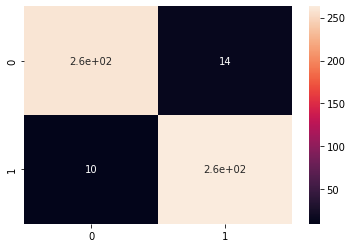

In [178]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,Y_train)
#Classification Report with training data
KNN_pred=KNN.predict(x_train)
KNN_cm=confusion_matrix(Y_train,KNN_pred)
print(sns.heatmap(KNN_cm,annot=True),"\n\n")
print("The accuracy is ",accuracy_score(Y_train,KNN_pred))

AxesSubplot(0.125,0.125;0.62x0.755) 


The accuracy is  0.9101123595505618


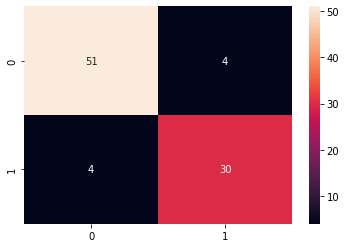

In [179]:
#Classification report with test data
KNN_pred=KNN.predict(x_test)
KNN_cm=confusion_matrix(Y_test,KNN_pred)
print(sns.heatmap(KNN_cm,annot=True),"\n\n")
print("The accuracy is ",accuracy_score(Y_test,KNN_pred))

### Hyperparameter Optimization

##### Grid Search CV

In [180]:
param_grid={
   'n_neighbors': [5,4,6,7,8,9,10,3]
}
from sklearn.model_selection import GridSearchCV
model_GSCV=GridSearchCV(estimator=KNN,param_grid=param_grid,cv=3,verbose=2)
model_GSCV.fit(x_train,Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 4, 6, 7, 8, 9, 10, 3]}, verbose=2)

In [181]:
model_GSCV.best_params_

{'n_neighbors': 3}

AxesSubplot(0.125,0.125;0.62x0.755) 


The accuracy is  0.9340659340659341


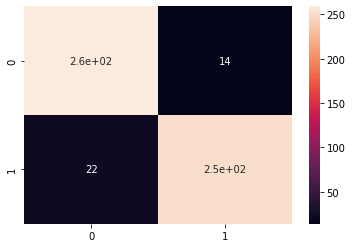

In [182]:
#Making my new optimized model
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train,Y_train)
#Classification Report with training data
KNN_pred=KNN.predict(x_train)
KNN_cm=confusion_matrix(Y_train,KNN_pred)
print(sns.heatmap(KNN_cm,annot=True),"\n\n")
print("The accuracy is ",accuracy_score(Y_train,KNN_pred))

AxesSubplot(0.125,0.125;0.62x0.755) 


The accuracy is  0.898876404494382


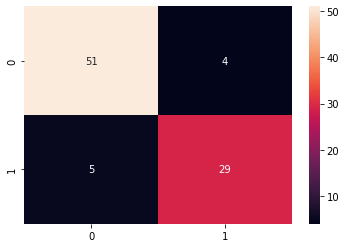

In [183]:
#Classification report with test data
KNN_pred_Y=KNN.predict(x_test)
KNN_cm=confusion_matrix(Y_test,KNN_pred_Y)
print(sns.heatmap(KNN_cm,annot=True),"\n\n")
print("The accuracy is ",accuracy_score(Y_test,KNN_pred_Y))

### Optimizing Model on the basis of  Problem Statement

In [184]:
# Malignant ==> 1, benign ==> 0
# benign means not dangerous 
# Malignant means leathal

In [185]:
from sklearn.metrics import classification_report
#Training data
print(classification_report(Y_train,KNN_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       273
           1       0.95      0.92      0.93       273

    accuracy                           0.93       546
   macro avg       0.93      0.93      0.93       546
weighted avg       0.93      0.93      0.93       546



#### ROC-AUC curve 

In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [187]:
#AUROC: area under roc curve
#training data
AUROC_training=roc_auc_score(Y_train,KNN_pred)
print(AUROC_training)
#test data
AUROC_test=roc_auc_score(Y_test,KNN_pred_Y)
print(AUROC_test)

0.934065934065934
0.8901069518716578


In [188]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(FPR, TPR, thresholds):
    plt.figure(figsize=(10,10))
    plt.plot(thresholds, FPR[:-1], "b--", label="FPR")
    plt.plot(thresholds, TPR[:-1], "g-", label="TPR")
    plt.xlabel("Threshold")
    plt.legend(loc='upper right', frameon=True)

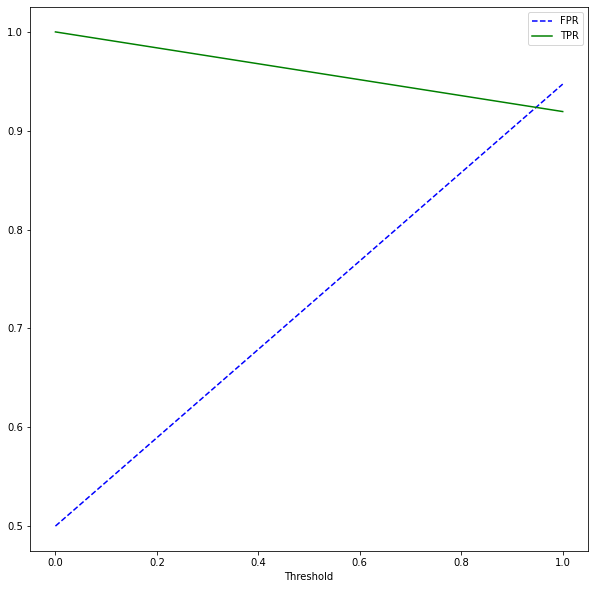

In [189]:
#For training data
FPR,TPR,thresholds=precision_recall_curve(Y_train,KNN_pred)
plot_precision_recall_vs_threshold(FPR,TPR,thresholds)

##### Selecting the best threshold

In [190]:
KNN.predict_proba(x_train)
prediction_prob_train=pd.DataFrame(KNN.predict_proba(x_train))
prediction_prob_train.drop(prediction_prob_train[[0]],axis=1,inplace=True)
prediction_prob_train=np.array(prediction_prob_train)
print(prediction_prob_train)
#This is probability of being benign(yes to breast cancer)

[[0. ]
 [1. ]
 [0.5]
 [1. ]
 [0. ]
 [1. ]
 [0.9]
 [1. ]
 [1. ]
 [0.1]
 [0. ]
 [1. ]
 [0.4]
 [0.4]
 [1. ]
 [1. ]
 [1. ]
 [0.9]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [0.7]
 [0. ]
 [0.7]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0.9]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [0.7]
 [0.9]
 [1. ]
 [0.8]
 [1. ]
 [0.1]
 [1. ]
 [0.8]
 [0.2]
 [1. ]
 [0. ]
 [1. ]
 [0.1]
 [0.6]
 [0.9]
 [0.6]
 [0. ]
 [0. ]
 [0. ]
 [0.7]
 [1. ]
 [0. ]
 [0.9]
 [0. ]
 [0.7]
 [0.8]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [0.6]
 [0.8]
 [0.7]
 [1. ]
 [0. ]
 [1. ]
 [0.2]
 [0.3]
 [0.8]
 [1. ]
 [1. ]
 [1. ]
 [0.4]
 [0. ]
 [0.7]
 [1. ]
 [1. ]
 [0.5]
 [0. ]
 [1. ]
 [1. ]
 [0.5]
 [0. ]
 [0.7]
 [0.9]
 [1. ]
 [0.7]
 [0.9]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [0. ]
 [0.1]
 [0. ]
 [0.8]
 [0.3]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [0.4]
 [0.9]
 [0.8]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [0. ]
 [0.1]
 [0. ]
 [1. ]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [0. ]
 [0.2]
 [1. ]
 [1. ]
 [1. ]
 [1. ]

In [191]:
KNN.predict_proba(x_test)
prediction_prob_test=pd.DataFrame(KNN.predict_proba(x_test))
prediction_prob_test.drop(prediction_prob_test[[0]],axis=1,inplace=True)
prediction_prob_test=np.array(prediction_prob_test)
print(prediction_prob_test)

[[0.1]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.4]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0.5]
 [0.1]
 [0. ]
 [0. ]
 [0. ]
 [0.7]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [0.5]
 [0.1]
 [0. ]
 [1. ]
 [0.9]
 [0. ]
 [0.3]
 [0. ]
 [0. ]
 [0.8]
 [0. ]
 [0. ]
 [0.8]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [0. ]
 [0.6]
 [0. ]
 [0.2]
 [0. ]
 [1. ]
 [0. ]
 [0. ]
 [1. ]
 [0.2]
 [0.5]
 [1. ]
 [0.4]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.7]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [0.6]
 [0.8]
 [1. ]
 [1. ]
 [0.8]
 [0.8]
 [0. ]
 [0. ]
 [0.6]
 [0. ]
 [0.8]
 [1. ]
 [1. ]
 [0.3]
 [0.5]
 [0. ]
 [0. ]
 [0. ]
 [1. ]
 [1. ]
 [0.1]
 [1. ]
 [0.1]
 [0. ]
 [1. ]
 [0.1]
 [0. ]
 [0. ]]


In [192]:
def change_threshold(array,threshold):
    prediction=[]
    for i in array:
        if i > threshold:
            i=1
            prediction.append(i)
        else:
            i=0
            prediction.append(i)
    return prediction

In [193]:
Y_pred_train=change_threshold(prediction_prob_train,0.69)
Y_pred_test=change_threshold(prediction_prob_test,0.69)

AxesSubplot(0.125,0.125;0.62x0.755) 


The accuracy is  0.9157509157509157


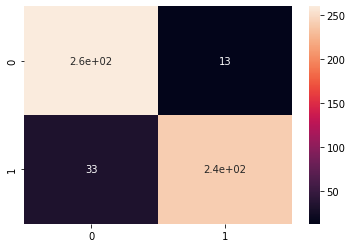

In [194]:
#Classification Report with training data
KNN_cm=confusion_matrix(Y_train,Y_pred_train)
print(sns.heatmap(KNN_cm,annot=True),"\n\n")
print("The accuracy is ",accuracy_score(Y_train,Y_pred_train))

AxesSubplot(0.125,0.125;0.62x0.755) 


The accuracy is  0.9101123595505618


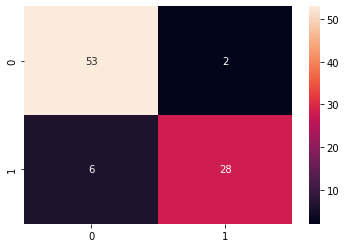

In [195]:
#Performance metrics with test data
KNN_cm=confusion_matrix(Y_test,Y_pred_test)
print(sns.heatmap(KNN_cm,annot=True),"\n\n")
print("The accuracy is ",accuracy_score(Y_test,Y_pred_test))

In [196]:
#Choosing a threshold value of 69%

## Model is completed!

In [197]:
# import pickle

In [201]:
# file="breast_cancer_model.pkl"
# my_file=open(file,"wb")
# pickle.dump(KNN,my_file)
# my_file.close()